# ELON MUSK

Sentimental analysis on the Elon-musk tweets 


In [3]:
import pandas as pd

In [4]:
musk=pd.read_csv("Elon_musk.csv",encoding='latin-1')
musk

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [5]:
musk.drop(['Unnamed: 0'],inplace=True,axis=1)

In [6]:
import re #regular expression
import string


In [7]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

In [8]:
musk["Text"]=musk["Text"].apply(clean)

In [9]:
musk.head()

,Text
0,im an alien
1,idaacarmack ray tracing on cyberpunk with hdr ...
2,joerogan spotify great interview
3,doge is underestimated
4,teslacn congratulations tesla china for amazin...


In [10]:
#Word frequency
freq = pd.Series(' '.join(musk['Text']).split()).value_counts()
freq

the              486
to               400
is               355
a                355
of               315
                ... 
pirate             1
attention          1
bare               1
that              1
amplification      1
Length: 4659, dtype: int64

In [11]:
import nltk
nltk.download('stopwords')

import nltk
nltk.download('punkt')
from nltk import tokenize

#removing stopwords
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PANCHI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PANCHI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
stop = stopwords.words('english')
musk['Text'] = musk['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [14]:
freq_Sw = pd.Series(' '.join(musk['Text']).split()).value_counts()
freq_Sw

spacex            239
amp               218
tesla             166
erdayastronaut    142
rt                127
                 ... 
compression         1
monopolist          1
rated               1
comments            1
amplification       1
Length: 4536, dtype: int64

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(musk["Text"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
#print(word_freq_df.sort('occurrences',ascending = False).head())

In [17]:
word_freq_df

,term,occurrences,frequency
0,aber,1,0.000075
1,able,6,0.000449
2,abo,1,0.000075
3,aboard,1,0.000075
4,abort,3,0.000224
...,...,...,...
4456,zshauladventure,1,0.000075
4457,zubinanary,1,0.000075
4458,zwiebelbach,1,0.000075
4459,zzcool,1,0.000075


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(musk["Text"])
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
df2 = pd.DataFrame(denselist, columns = names_features)

In [20]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [22]:
top2_words = get_top_n2_words(musk["Text"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["tri-gram", "Freq"]
top2_df.head()

,tri-gram,Freq
0,rt spacex falcon,17
1,falcon first stage,9
2,spacex falcon first,8
3,thesheetztweetz waemd spacex,8
4,course still love,7


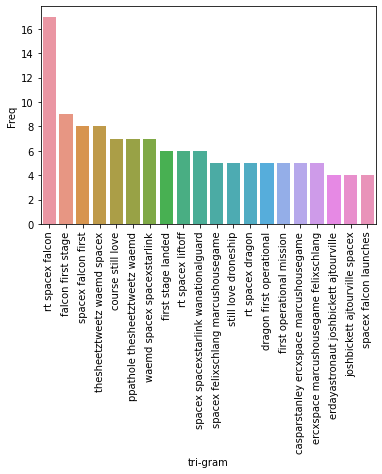

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=top2_df["tri-gram"][:20],y=top2_df["Freq"][:20])
plt.xticks(rotation=90);

In [24]:
!pip install wordcloud


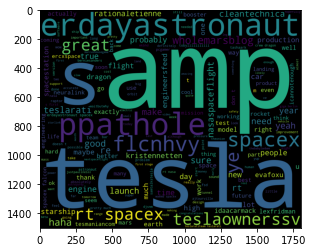

In [25]:
string_Total = " ".join(musk["Text"])
#wordcloud for entire corpus
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(string_Total)
plt.imshow(wordcloud_stw)

In [27]:
!pip install afinn
from afinn import Afinn
afinn=Afinn(language='en')#setting language to english

  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53455 sha256=c20583f6a499c400d69f3e388bb26dcf2096105d6ca568aa8f43b2a4a97e8aba
  Stored in directory: c:\users\panchi\appdata\local\pip\cache\wheels\f6\6f\c3\b305c5107a17618f2938a067d5ffcbb556909d82398762089e
Successfully built afinn


In [28]:
musk["afinn_score"]= musk["Text"].apply(afinn.score)#to calculate the sentiment total score of each documents in text.
musk

,Text,afinn_score
0,im alien,0.0
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0.0
2,joerogan spotify great interview,3.0
3,doge underestimated,-1.0
4,teslacn congratulations tesla china amazing ex...,6.0
...,...,...
1994,flcnhvy true sounds surreal negative propagand...,-1.0
1995,ppathole make sure read ur terms amp condition...,1.0
1996,teslagong ppathole samwise gamgee,0.0
1997,ppathole altho dumb dumber,-3.0


In [29]:
#for word counting to further generalize afinn_score
def word_count(text_string):
    '''Calculate the number of words in a string'''
    return len(text_string.split())

In [31]:
musk['word_count'] = musk['Text'].apply(word_count)


In [33]:
musk['afinn_adjusted_score'] = musk['afinn_score'] / musk['word_count'] * 100
musk

,Text,afinn_score,word_count,afinn_adjusted_score
0,im alien,0.0,2,0.000000
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0.0,7,0.000000
2,joerogan spotify great interview,3.0,4,75.000000
3,doge underestimated,-1.0,2,-50.000000
4,teslacn congratulations tesla china amazing ex...,6.0,10,60.000000
...,...,...,...,...
1994,flcnhvy true sounds surreal negative propagand...,-1.0,11,-9.090909
1995,ppathole make sure read ur terms amp condition...,1.0,10,10.000000
1996,teslagong ppathole samwise gamgee,0.0,4,0.000000
1997,ppathole altho dumb dumber,-3.0,4,-75.000000


In [35]:
musk.describe()

,afinn_score,word_count,afinn_adjusted_score
count,1999.000000,1999.000000,1974.000000
mean,0.818909,6.708854,15.257215
std,1.872894,4.067040,37.040073
min,-7.000000,0.000000,-300.000000
25%,0.000000,3.000000,0.000000
50%,0.000000,6.000000,0.000000
75%,2.000000,10.000000,27.272727
max,12.000000,20.000000,200.000000


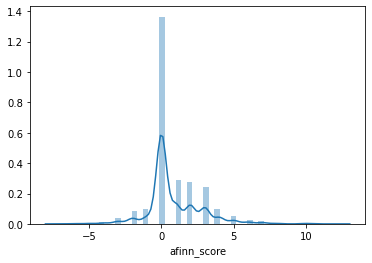

In [37]:
import seaborn as sns
sns.distplot(musk["afinn_score"])

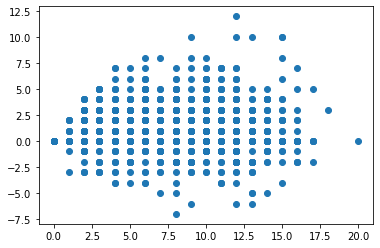

In [39]:
plt.scatter(y='afinn_score', x='word_count',data=musk)

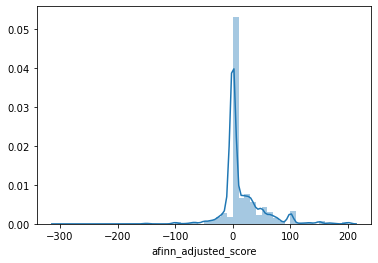

In [41]:
sns.distplot(musk["afinn_adjusted_score"]);

#As we can see plot is positively skewed we can say that sentimental of most tweet are +ve (good) in nature

# Amazon

In [42]:
import numpy as np 
import pandas as pd

In [45]:
az=pd.read_excel("review.xlsx")
az

,reviews.text
0,I thought it would be as big as small paper bu...
1,This kindle is light and easy to use especiall...
2,Didnt know how much i'd use a kindle so went f...
3,I am 100 happy with my purchase. I caught it o...
4,Solid entry level Kindle. Great for kids. Gift...
...,...
4995,This is a great tablet for the price. Amazon i...
4996,This tablet is the perfect size and so easy to...
4997,Purchased this for my son. Has room to upgrade...
4998,I had some thoughts about getting this for a 5...


In [46]:
import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

In [47]:
az['reviews.text'] = az['reviews.text'].apply(clean)
az

,reviews.text
0,i thought it would be as big as small paper bu...
1,this kindle is light and easy to use especiall...
2,didnt know how much id use a kindle so went fo...
3,i am happy with my purchase i caught it on sa...
4,solid entry level kindle great for kids gifted...
...,...
4995,this is a great tablet for the price amazon is...
4996,this tablet is the perfect size and so easy to...
4997,purchased this for my son has room to upgrade ...
4998,i had some thoughts about getting this for a ...


In [48]:
#Word frequency
freq = pd.Series(' '.join(az['reviews.text']).split()).value_counts()
freq

the           6738
to            5015
and           5008
it            4719
i             4491
              ... 
germany          1
asphalt          1
marginally       1
annual           1
boost            1
Length: 5927, dtype: int64

In [50]:
import nltk
nltk.download('stopwords')

import nltk
nltk.download('punkt')
from nltk import tokenize

#removing stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
az['reviews.text'] = az['reviews.text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PANCHI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PANCHI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [51]:
freq_Sw = pd.Series(' '.join(az['reviews.text']).split()).value_counts()
freq_Sw

great            1591
tablet           1296
love             1083
use              1081
easy              816
                 ... 
opposed             1
wo                  1
communication       1
watchread           1
reconnect           1
Length: 5796, dtype: int64

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(az["reviews.text"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
#print(word_freq_df.sort('occurrences',ascending = False).head())

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(az["reviews.text"])
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
df2 = pd.DataFrame(denselist, columns = names_features)

In [55]:
#bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [57]:
top2_words = get_top_n2_words(az["reviews.text"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["bi-gram", "Freq"]
top2_df.head()

,bi-gram,Freq
0,easy use,340
1,year old,233
2,echo show,174
3,kindle fire,145
4,works great,144


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

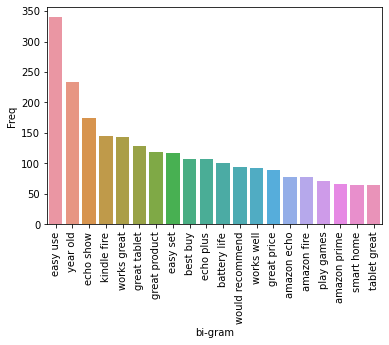

In [58]:
import seaborn as sns
sns.barplot(x=top2_df["bi-gram"][:20],y=top2_df["Freq"][:20])   #Most of customer has reviews about "easy use" on amazon products which is good.
plt.xticks(rotation=90)

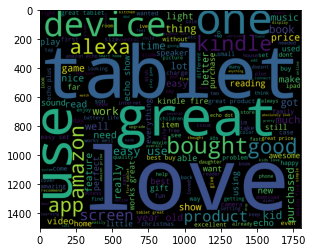

In [59]:
string_Total = " ".join(az["reviews.text"])
#wordcloud for entire corpus
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(string_Total)
plt.imshow(wordcloud_stw) 

Most word is used in amazon review +ve like Love , Great etc

Most reviwes are about tablet, kindle,alexa and so on.

In [62]:
az["afinn_score"]= az["reviews.text"].apply(afinn.score)#to calculate the sentiment total score of each documents in text.
az

,reviews.text,afinn_score
0,thought would big small paper turn like palm t...,7.0
1,kindle light easy use especially beach,1.0
2,didnt know much id use kindle went lower end i...,3.0
3,happy purchase caught sale really good price n...,17.0
4,solid entry level kindle great kids gifted kid...,14.0
...,...,...
4995,great tablet price amazon good job,6.0
4996,tablet perfect size easy use read play games p...,7.0
4997,purchased son room upgrade memory allow books ...,5.0
4998,thoughts getting year old get screen protector...,0.0


In [63]:
def word_count(text_string):
    '''Calculate the number of words in a string'''
    return len(text_string.split())

In [64]:
az['word_count'] = az['reviews.text'].apply(word_count)
az

,reviews.text,afinn_score,word_count
0,thought would big small paper turn like palm t...,7.0,19
1,kindle light easy use especially beach,1.0,6
2,didnt know much id use kindle went lower end i...,3.0,14
3,happy purchase caught sale really good price n...,17.0,69
4,solid entry level kindle great kids gifted kid...,14.0,19
...,...,...,...
4995,great tablet price amazon good job,6.0,6
4996,tablet perfect size easy use read play games p...,7.0,10
4997,purchased son room upgrade memory allow books ...,5.0,14
4998,thoughts getting year old get screen protector...,0.0,12


In [66]:
az.describe()

,afinn_score,word_count
count,5000.000000,5000.000000
mean,4.825400,15.355400
std,4.191996,21.944717
min,-8.000000,1.000000
25%,2.000000,7.000000
50%,4.000000,10.000000
75%,7.000000,17.000000
max,53.000000,739.000000


In [67]:
az['afinn_adjusted_score'] = az['afinn_score'] / az['word_count'] * 100
az

,reviews.text,afinn_score,word_count,afinn_adjusted_score
0,thought would big small paper turn like palm t...,7.0,19,36.842105
1,kindle light easy use especially beach,1.0,6,16.666667
2,didnt know much id use kindle went lower end i...,3.0,14,21.428571
3,happy purchase caught sale really good price n...,17.0,69,24.637681
4,solid entry level kindle great kids gifted kid...,14.0,19,73.684211
...,...,...,...,...
4995,great tablet price amazon good job,6.0,6,100.000000
4996,tablet perfect size easy use read play games p...,7.0,10,70.000000
4997,purchased son room upgrade memory allow books ...,5.0,14,35.714286
4998,thoughts getting year old get screen protector...,0.0,12,0.000000


In [69]:
print(np.round(az[az["afinn_adjusted_score"]>0].shape[0]/(az.shape[0])*100,2),"%")

88.16 %


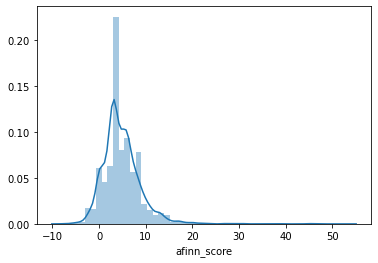

In [71]:
sns.distplot(az["afinn_score"]) ;

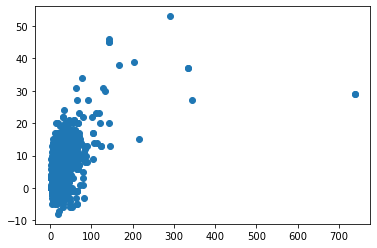

In [72]:
plt.scatter(y='afinn_score', x='word_count',data=az)

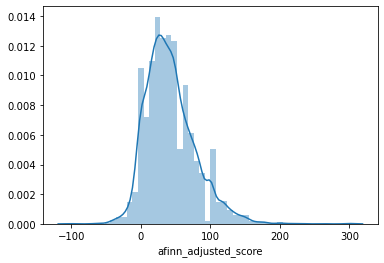

In [73]:
sns.distplot(az["afinn_adjusted_score"])